In [1]:
import re
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

## 1 数据预处理

#### 1.1 查看数据头部

In [30]:
data = pd.read_csv("./训练数据集/preprocess_train.csv",index_col='sample_id')
data.head(10)    # 展示开头的十个数据

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,label
sample_id,,,,,,,,,,,,,,,,,,,,,
0,51.567250,288358.4,NaN,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,222221.210940,2.002797e+14,...,31459.628135,254.582034,0.0,-2.014506e+08,159.299350,0.603211,NaN,-5.256075,180.977310,4
1,63.804874,288358.4,1.106802,1.050387,391.605375,13.323439,4.662871,NaN,-144247.357554,2.601894e+15,...,42830.526855,270.580779,0.0,-1.534970e+09,NaN,0.506220,0.552654,16.505952,314.783263,5
2,49.138527,288358.4,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-428840.326950,1.363373e+14,...,249963.241809,160.207067,0.0,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610,2
3,NaN,288358.4,1.109169,NaN,258.521076,0.716737,23.238461,-3.539891e+11,NaN,-1.338632e+15,...,125478.297201,196.223295,0.0,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670,2
4,76.520831,288358.4,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,649972.266570,2.800250e+15,...,186266.423019,179.083883,0.0,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233,2
5,69.382708,288358.4,1.104777,NaN,305.698044,13.083625,1.245862,NaN,NaN,-1.481596e+14,...,213691.030451,174.139506,0.0,-5.085526e+08,77.987169,NaN,0.453295,-6.270081,187.442222,5
6,52.028350,NaN,1.103117,1.547828,209.218614,1.852464,7.632214,-5.945734e+11,-60071.827356,1.958075e+15,...,NaN,363.802236,0.0,-1.627930e+08,160.969145,0.397301,1.462804,-12.761006,241.760188,2
7,73.836682,288358.4,1.107634,0.633408,184.561828,12.561986,-0.905921,4.435676e+11,-284754.674443,-2.433975e+15,...,126283.148294,244.028825,0.0,5.335959e+08,241.452323,0.644559,0.701915,7.404278,50.247619,3
8,112.047223,288358.4,1.102054,NaN,194.199467,22.006422,-17.001179,1.102226e+11,-145636.421296,1.019214e+15,...,250790.091782,267.276724,0.0,-2.712686e+08,209.915302,1.586125,3.630870,4.044245,319.808763,0


#### 1.2 分割数据集

In [31]:
# 将数据分割为特征集和标签
X = data.drop(['label'], axis=1)
Y = data['label']

#### 1.3 处理特征集X（填充缺失值、数据归一化）

In [32]:
# 查找含有缺失值的列标签
cols_with_missing_values = X.columns[X.isnull().any()].tolist()

# 打印含有缺失值的列数量
print('共有', len(cols_with_missing_values), '列含有缺失值')

# 使用中位数填充缺失值
for col in cols_with_missing_values:
    median = X[col].median()
    X[col].fillna(median, inplace=True)
X

共有 77 列含有缺失值


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106
sample_id,,,,,,,,,,,,,,,,,,,,,
0,51.567250,288358.400000,1.105024,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,2.222212e+05,2.002797e+14,...,-14.701891,3.145963e+04,254.582034,0.0,-2.014506e+08,159.299350,0.603211,0.938081,-5.256075,180.977310
1,63.804874,288358.400000,1.106802,1.050387,391.605375,13.323439,4.662871,1.933081e+10,-1.442474e+05,2.601894e+15,...,-8.959940,4.283053e+04,270.580779,0.0,-1.534970e+09,179.581878,0.506220,0.552654,16.505952,314.783263
2,49.138527,288358.400000,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-4.288403e+05,1.363373e+14,...,32.159667,2.499632e+05,160.207067,0.0,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610
3,59.731766,288358.400000,1.109169,0.729861,258.521076,0.716737,23.238461,-3.539891e+11,1.242925e+04,-1.338632e+15,...,1.815809,1.254783e+05,196.223295,0.0,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670
4,76.520831,288358.400000,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,6.499723e+05,2.800250e+15,...,40.623904,1.862664e+05,179.083883,0.0,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,70.406112,288358.400000,1.098904,0.134016,222.782078,8.751254,21.783621,-9.018455e+11,-4.047841e+05,-3.356174e+15,...,6.196076,5.235188e+04,217.577771,0.0,-9.042319e+06,203.750885,0.102876,2.385235,-3.557545,154.955008
6292,72.795989,288358.400000,1.105024,0.503558,408.101229,22.436609,5.631515,-2.376201e+11,-4.051203e+05,-1.150051e+15,...,15.013753,1.322888e+05,178.635641,0.0,3.529909e+08,162.268924,0.824727,1.279274,-8.085779,231.487352
6293,71.210154,515352.218703,2.101946,13.816881,-78.826173,111.744022,50.800576,5.065975e+12,4.996345e+06,6.479128e+14,...,95.670057,1.662894e+06,-76.537164,0.0,-7.378573e+08,137.228629,12.985847,0.143317,139.819816,-103.883245


In [33]:
idx = (X.var() != 0).to_numpy()
X = X.iloc[:, idx]
X

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature96,feature97,feature98,feature99,feature101,feature102,feature103,feature104,feature105,feature106
sample_id,,,,,,,,,,,,,,,,,,,,,
0,51.567250,288358.400000,1.105024,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,2.222212e+05,2.002797e+14,...,-8.066271e+05,-14.701891,3.145963e+04,254.582034,-2.014506e+08,159.299350,0.603211,0.938081,-5.256075,180.977310
1,63.804874,288358.400000,1.106802,1.050387,391.605375,13.323439,4.662871,1.933081e+10,-1.442474e+05,2.601894e+15,...,9.658908e+05,-8.959940,4.283053e+04,270.580779,-1.534970e+09,179.581878,0.506220,0.552654,16.505952,314.783263
2,49.138527,288358.400000,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-4.288403e+05,1.363373e+14,...,5.733177e+05,32.159667,2.499632e+05,160.207067,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610
3,59.731766,288358.400000,1.109169,0.729861,258.521076,0.716737,23.238461,-3.539891e+11,1.242925e+04,-1.338632e+15,...,8.423093e+05,1.815809,1.254783e+05,196.223295,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670
4,76.520831,288358.400000,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,6.499723e+05,2.800250e+15,...,6.578322e+05,40.623904,1.862664e+05,179.083883,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,70.406112,288358.400000,1.098904,0.134016,222.782078,8.751254,21.783621,-9.018455e+11,-4.047841e+05,-3.356174e+15,...,5.056420e+05,6.196076,5.235188e+04,217.577771,-9.042319e+06,203.750885,0.102876,2.385235,-3.557545,154.955008
6292,72.795989,288358.400000,1.105024,0.503558,408.101229,22.436609,5.631515,-2.376201e+11,-4.051203e+05,-1.150051e+15,...,6.238947e+05,15.013753,1.322888e+05,178.635641,3.529909e+08,162.268924,0.824727,1.279274,-8.085779,231.487352
6293,71.210154,515352.218703,2.101946,13.816881,-78.826173,111.744022,50.800576,5.065975e+12,4.996345e+06,6.479128e+14,...,4.250252e+05,95.670057,1.662894e+06,-76.537164,-7.378573e+08,137.228629,12.985847,0.143317,139.819816,-103.883245


In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 保留列名并将数据转换为NumPy数组
cols = X.columns
x = X.values

# 创建一个MinMaxScaler对象，将特征缩放到 [0, 1] 范围内
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# 将NumPy数组转换回Pandas DataFrame，并将列名与归一化后的数据合并
data = pd.DataFrame(X_normalized, columns=cols)

# 打印归一化后的数据
data


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature96,feature97,feature98,feature99,feature101,feature102,feature103,feature104,feature105,feature106
sample_id,,,,,,,,,,,,,,,,,,,,,
0,51.567250,288358.400000,1.105024,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,2.222212e+05,2.002797e+14,...,-8.066271e+05,-14.701891,3.145963e+04,254.582034,-2.014506e+08,159.299350,0.603211,0.938081,-5.256075,180.977310
1,63.804874,288358.400000,1.106802,1.050387,391.605375,13.323439,4.662871,1.933081e+10,-1.442474e+05,2.601894e+15,...,9.658908e+05,-8.959940,4.283053e+04,270.580779,-1.534970e+09,179.581878,0.506220,0.552654,16.505952,314.783263
2,49.138527,288358.400000,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-4.288403e+05,1.363373e+14,...,5.733177e+05,32.159667,2.499632e+05,160.207067,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610
3,59.731766,288358.400000,1.109169,0.729861,258.521076,0.716737,23.238461,-3.539891e+11,1.242925e+04,-1.338632e+15,...,8.423093e+05,1.815809,1.254783e+05,196.223295,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670
4,76.520831,288358.400000,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,6.499723e+05,2.800250e+15,...,6.578322e+05,40.623904,1.862664e+05,179.083883,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,70.406112,288358.400000,1.098904,0.134016,222.782078,8.751254,21.783621,-9.018455e+11,-4.047841e+05,-3.356174e+15,...,5.056420e+05,6.196076,5.235188e+04,217.577771,-9.042319e+06,203.750885,0.102876,2.385235,-3.557545,154.955008
6292,72.795989,288358.400000,1.105024,0.503558,408.101229,22.436609,5.631515,-2.376201e+11,-4.051203e+05,-1.150051e+15,...,6.238947e+05,15.013753,1.322888e+05,178.635641,3.529909e+08,162.268924,0.824727,1.279274,-8.085779,231.487352
6293,71.210154,515352.218703,2.101946,13.816881,-78.826173,111.744022,50.800576,5.065975e+12,4.996345e+06,6.479128e+14,...,4.250252e+05,95.670057,1.662894e+06,-76.537164,-7.378573e+08,137.228629,12.985847,0.143317,139.819816,-103.883245


## 尝试
#### 使用未剔除关联性差的特征的数据集、默认参数的svm模型进行测试

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# 分割数据集

def test(X, Y, model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
    # 模型训练
    model.fit(x_train,y_train)
    # 模型预测
    y_predicted = model.predict(x_test)
    # 输出模型评价
    print(classification_report(y_test, y_predicted))

# 创建SVM模型
svc = SVC()
test(data,Y,svc)



              precision    recall  f1-score   support

           0       0.75      1.00      0.86       638
           1       0.96      0.38      0.55       133
           2       0.69      0.68      0.69       207
           3       0.97      0.32      0.48       116
           4       0.91      0.51      0.65        79
           5       1.00      0.86      0.93        87

    accuracy                           0.78      1260
   macro avg       0.88      0.63      0.69      1260
weighted avg       0.81      0.78      0.75      1260



## 2 精简数据特征列

In [45]:
from sklearn.ensemble import RandomForestClassifier

# 构建随机森林模型
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
# 训练模型并进行预测
rfc.fit(data, Y)
importances = rfc.feature_importances_

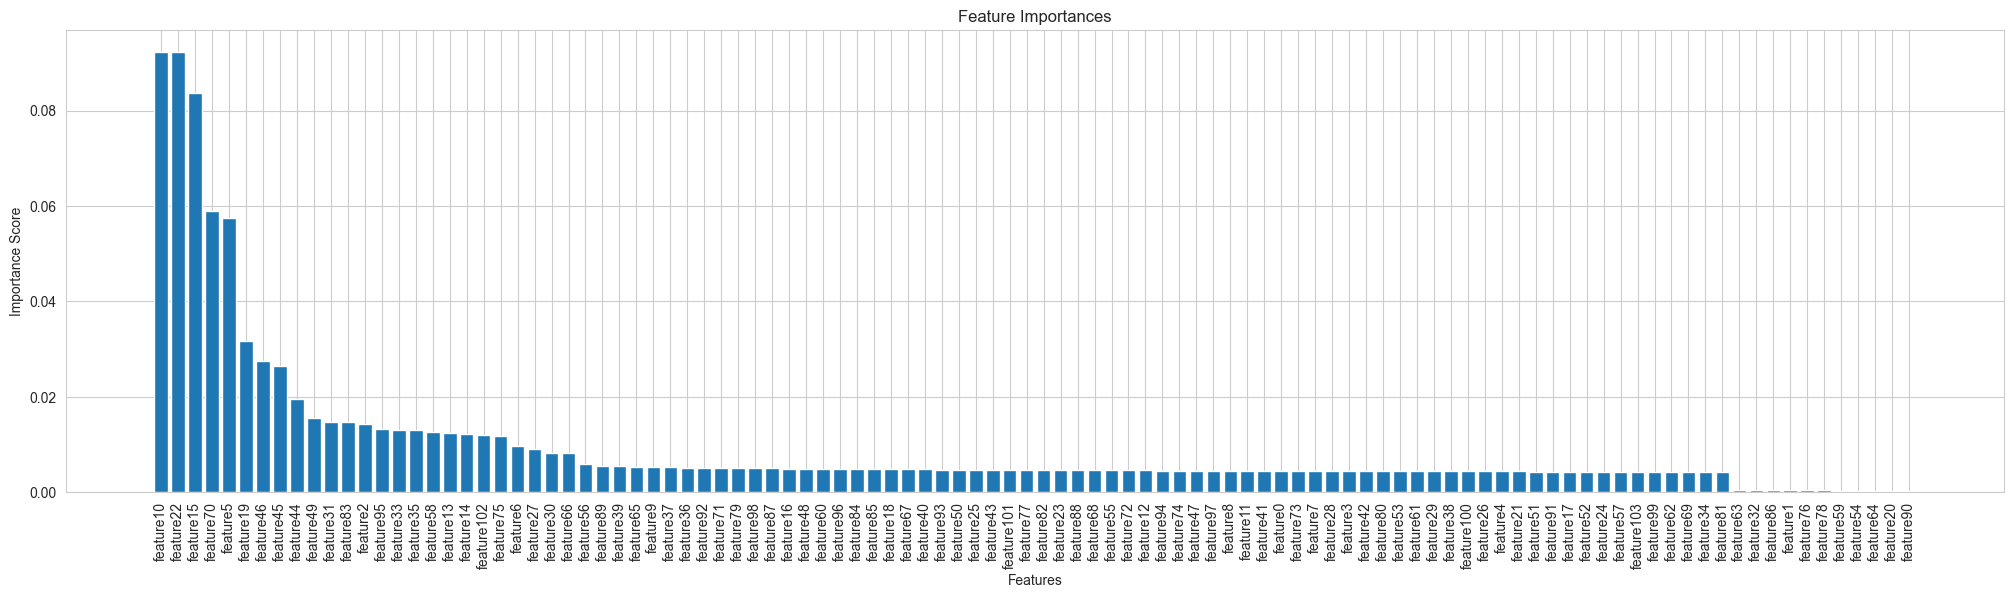

In [46]:
# 将特征名称和重要性分数放在一起
feature_names = np.array(['feature{}'.format(i) for i in range(data.shape[1])])
features = np.vstack((feature_names, importances)).T
# 按照重要性分数对特征进行排序
sorted_idx = np.argsort(importances)[::-1]
sorted_features1 = features[sorted_idx]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(25, 6))
plt.bar(sorted_features1[:, 0], sorted_features1[:, 1].astype(float))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()


In [94]:
arr1 = []
arr2 = []
for i in range(10):
    arr2.append(sorted_features1[i][0])
for i in range(20):
    print(sorted_features1[i][0].ljust(11),sorted_features1[i][1].ljust(20))
    arr1.append(sorted_features1[i][0])

feature10   0.09227549799825592 
feature22   0.0921971696069525  
feature15   0.08362848603085832 
feature70   0.05884334482041729 
feature5    0.05741576933190071 
feature19   0.03159905972557249 
feature46   0.027461261219100305
feature45   0.026408309274802005
feature44   0.01945291817623922 
feature49   0.015576574873918536
feature31   0.014773170132511067
feature83   0.014697753322483189
feature2    0.014164250227011038
feature95   0.013248089424020315
feature33   0.013048949353620288
feature35   0.012983397581684672
feature58   0.012642051499470846
feature13   0.012454357664941792
feature14   0.012159203548522164
feature102  0.01195346513187236 


In [65]:
def test(X, Y, model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
    # 模型训练
    model.fit(x_train,y_train)
    # 模型预测
    y_predicted = model.predict(x_test)
    # 输出模型评价
    print(classification_report(y_test, y_predicted))

x1 = data[arr1]
svc = SVC()
test(x1,Y,svc)


              precision    recall  f1-score   support

           0       0.80      1.00      0.88       638
           1       0.92      0.41      0.57       133
           2       0.67      0.70      0.68       207
           3       0.96      0.55      0.70       116
           4       0.88      0.47      0.61        79
           5       1.00      0.86      0.93        87

    accuracy                           0.80      1260
   macro avg       0.87      0.67      0.73      1260
weighted avg       0.82      0.80      0.79      1260



## 3 寻找SVM的最优参数

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['rbf'], 'decision_function_shape': ['ovr', 'ovo'], 'C':[1,10,1e2,1e3,5e3,1e4,5e4,1e5], 'gamma':[2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 'auto']},
]

model = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=10, n_jobs=5)
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

print("GridSearchCV搜索最优参数......")
model.fit(X_train, y_train)
print("最优参数搜索完毕......")
best = model.best_estimator_

GridSearchCV搜索最优参数......
Fitting 5 folds for each of 160 candidates, totalling 800 fits
最优参数搜索完毕......


In [73]:
print("模型的最优参数：", model.best_params_)
print("最优模型分数：", model.best_score_)
print("最优模型对象：", model.best_estimator_)

模型的最优参数： {'C': 10, 'decision_function_shape': 'ovr', 'gamma': 1, 'kernel': 'rbf'}
最优模型分数： 0.8005567757832296
最优模型对象： SVC(C=10, gamma=1)


In [81]:
def model(X, Y, model):
    # 模型预测
    y_predicted = model.predict(X)
    # 输出模型评价
    print(classification_report(Y, y_predicted))
    # 绘制混淆矩阵热力图
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.4)
    cm = confusion_matrix(Y, y_predicted, labels=[0, 1, 2, 3, 4, 5])
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues') # 画热力图
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       638
           1       0.75      0.60      0.67       133
           2       0.76      0.65      0.70       207
           3       0.85      0.71      0.77       116
           4       0.89      0.75      0.81        79
           5       1.00      0.86      0.93        87

    accuracy                           0.83      1260
   macro avg       0.85      0.76      0.80      1260
weighted avg       0.83      0.83      0.83      1260



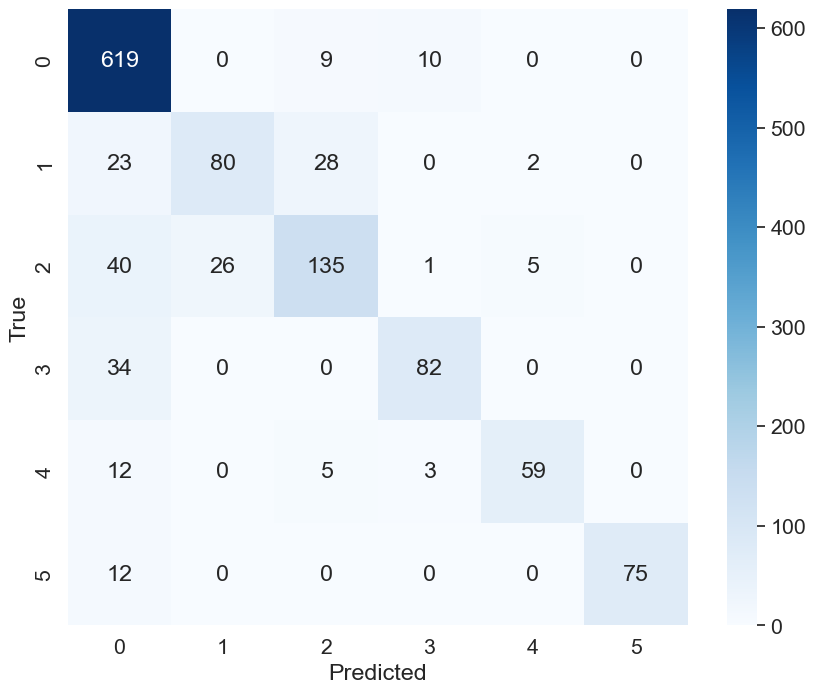

In [83]:
svc = best
model(X_test,y_test,svc)

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['rbf'], 'decision_function_shape': ['ovr', 'ovo'], 'C':[1,10,1e2,1e3,5e3,1e4,5e4,1e5], 'gamma':[2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 'auto']},
]

model = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=10, n_jobs=5)
X_train, X_test, y_train, y_test = train_test_split(x1, Y, test_size=0.2, random_state=42)

print("GridSearchCV搜索最优参数......")
model.fit(X_train, y_train)
print("最优参数搜索完毕......")
best1 = model.best_estimator_

GridSearchCV搜索最优参数......
Fitting 5 folds for each of 160 candidates, totalling 800 fits
最优参数搜索完毕......


In [90]:
print("模型的最优参数：", model.best_params_)
print("最优模型分数：", model.best_score_)
print("最优模型对象：", model.best_estimator_)

模型的最优参数： {'C': 1000.0, 'decision_function_shape': 'ovr', 'gamma': 0.5, 'kernel': 'rbf'}
最优模型分数： 0.8022393245930133
最优模型对象： SVC(C=1000.0, gamma=0.5)


In [91]:
def model(X, Y, model):
    # 模型预测
    y_predicted = model.predict(X)
    # 输出模型评价
    print(classification_report(Y, y_predicted))
    # 绘制混淆矩阵热力图
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.4)
    cm = confusion_matrix(Y, y_predicted, labels=[0, 1, 2, 3, 4, 5])
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues') # 画热力图
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       638
           1       0.65      0.65      0.65       133
           2       0.74      0.60      0.66       207
           3       0.90      0.70      0.79       116
           4       0.95      0.73      0.83        79
           5       1.00      0.85      0.92        87

    accuracy                           0.83      1260
   macro avg       0.85      0.75      0.79      1260
weighted avg       0.83      0.83      0.82      1260



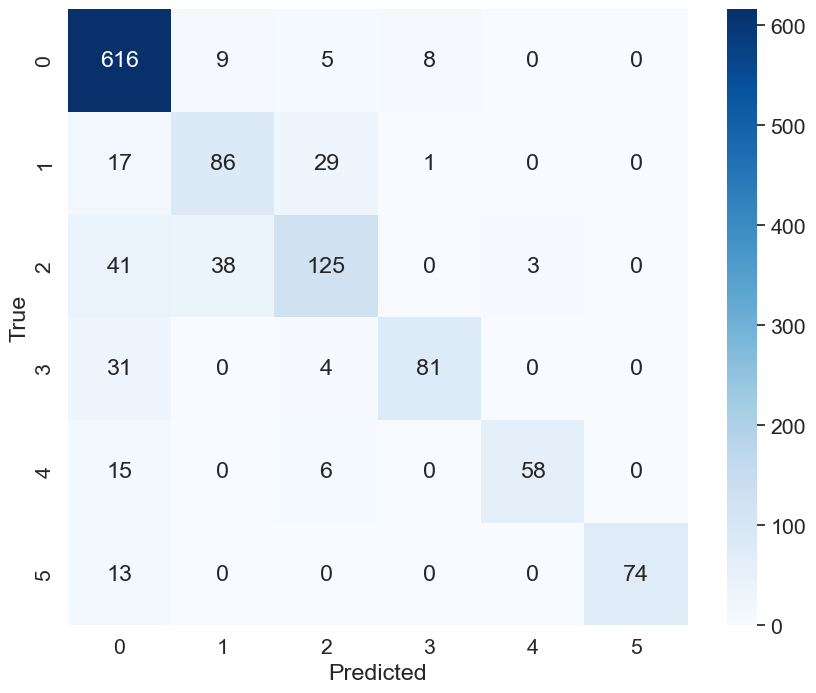

In [92]:
svc = best1
model(X_test,y_test,svc)

In [95]:
x2 = data[arr2]
x2

,feature10,feature22,feature15,feature70,feature5,feature19,feature46,feature45,feature44,feature49
0,0.466502,0.028904,0.237759,0.234547,0.197910,0.250152,0.222012,0.070371,0.188007,0.318119
1,0.549941,0.195468,0.242369,0.193382,0.237399,0.211485,0.188807,0.087205,0.205843,0.259817
2,0.549127,0.034309,0.238957,0.225916,0.197343,0.217029,0.418918,0.080201,0.300387,0.282423
3,0.546129,0.024425,0.239699,0.205855,0.163550,0.231466,0.241883,0.047029,0.219607,0.302583
4,0.547150,0.024439,0.237759,0.114414,0.148787,0.242334,0.255918,0.103290,0.330424,0.267516
...,...,...,...,...,...,...,...,...,...,...
6291,0.547021,0.033294,0.147323,0.188178,0.210616,0.301705,0.274285,0.082224,0.142819,0.290070
6292,0.542233,0.032700,0.144465,0.211638,0.290783,0.293424,0.149830,0.098247,0.247514,0.259257
6293,0.985090,0.034309,0.272330,0.188178,0.813935,0.688770,0.708303,0.096687,0.600376,0.668390
6294,0.547129,0.034309,0.238361,0.188178,0.212449,0.227085,0.267566,0.082098,0.153674,0.293166


In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['rbf'], 'decision_function_shape': ['ovr', 'ovo'], 'C':[1,10,1e2,1e3,5e3,1e4,5e4,1e5], 'gamma':[2, 1.5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 'auto']},
]

model = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=10, n_jobs=5)
X_train, X_test, y_train, y_test = train_test_split(x2, Y, test_size=0.2, random_state=42)

print("GridSearchCV搜索最优参数......")
model.fit(X_train, y_train)
print("最优参数搜索完毕......")
best1 = model.best_estimator_


GridSearchCV搜索最优参数......
Fitting 5 folds for each of 160 candidates, totalling 800 fits
最优参数搜索完毕......


In [97]:
print("模型的最优参数：", model.best_params_)
print("最优模型分数：", model.best_score_)
print("最优模型对象：", model.best_estimator_)

模型的最优参数： {'C': 10000.0, 'decision_function_shape': 'ovr', 'gamma': 2, 'kernel': 'rbf'}
最优模型分数： 0.8100840195235314
最优模型对象： SVC(C=10000.0, gamma=2)


In [98]:
def model(X, Y, model):
    # 模型预测
    y_predicted = model.predict(X)
    # 输出模型评价
    print(classification_report(Y, y_predicted))
    # 绘制混淆矩阵热力图
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.4)
    cm = confusion_matrix(Y, y_predicted, labels=[0, 1, 2, 3, 4, 5])
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues') # 画热力图
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       638
           1       0.60      0.68      0.64       133
           2       0.78      0.57      0.66       207
           3       0.96      0.80      0.87       116
           4       0.97      0.75      0.84        79
           5       0.99      0.83      0.90        87

    accuracy                           0.83      1260
   macro avg       0.86      0.77      0.80      1260
weighted avg       0.84      0.83      0.83      1260



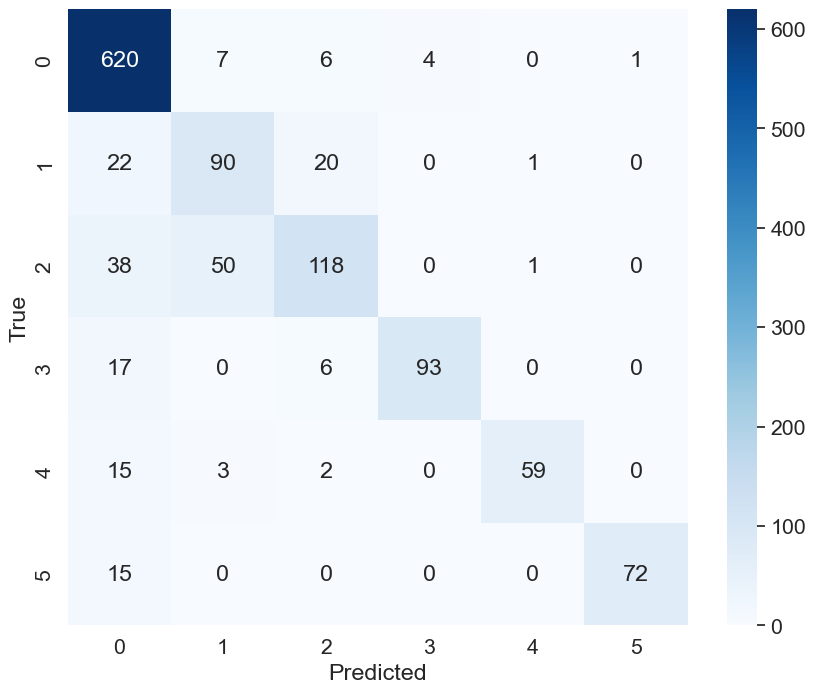

In [99]:
svc = best1
model(X_test,y_test,svc)